In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

#Goalkeeper processing
goalkeeper_data = pd.read_csv('goalkeeper_data.csv', sep=',')
goalkeeper_y = goalkeeper_data['fee_cleaned']
goalkeeper_X = goalkeeper_data.drop(columns =['fee_cleaned'])
X_train_goalkeeper, X_test_goalkeeper, y_train_goalkeeper, y_test_goalkeeper = train_test_split(goalkeeper_X, goalkeeper_y, test_size=0.20, random_state = 1)
X_train_goalkeeper = sc_X.fit_transform(X_train_goalkeeper)
X_test_goalkeeper = sc_X.fit_transform(X_test_goalkeeper)

#Defender processing
defender_data = pd.read_csv('defender_data.csv', sep=',')
defender_y = defender_data['fee_cleaned']
defender_X = defender_data.drop(columns =['fee_cleaned'])
X_train_defender, X_test_defender, y_train_defender, y_test_defender = train_test_split(defender_X, defender_y, test_size=0.20, random_state = 1)
X_train_defender = sc_X.fit_transform(X_train_defender)
X_test_defender = sc_X.fit_transform(X_test_defender)

#Midfielder processing
midfielder_data = pd.read_csv('midfielder_data.csv', sep=',')
midfielder_y = midfielder_data['fee_cleaned']
midfielder_X = midfielder_data.drop(columns =['fee_cleaned'])
X_train_midfielder, X_test_midfielder, y_train_midfielder, y_test_midfielder = train_test_split(midfielder_X, midfielder_y, test_size=0.20, random_state = 1)
X_train_midfielder = sc_X.fit_transform(X_train_midfielder)
X_test_midfielder = sc_X.fit_transform(X_test_midfielder)

#Attacker processing
attacker_data = pd.read_csv('attacker_data.csv', sep=',')
attacker_y = attacker_data['fee_cleaned']
attacker_X = attacker_data.drop(columns =['fee_cleaned'])
X_train_attacker, X_test_attacker, y_train_attacker, y_test_attacker = train_test_split(attacker_X, attacker_y, test_size=0.20, random_state = 1)
X_train_attacker = sc_X.fit_transform(X_train_attacker)
X_test_attacker = sc_X.fit_transform(X_test_attacker)

In [24]:
#Goalkeeper
rf_goalkeeper = RandomForestRegressor(bootstrap = True, max_depth = 60, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 176, random_state = 1)
rf_goalkeeper.fit(X_train_goalkeeper, y_train_goalkeeper)
predictions_goalkeeper = rf_goalkeeper.predict(X_test_goalkeeper)
r2_score_goalkeeper = r2_score(y_test_goalkeeper, predictions_goalkeeper)
mse_test_set = mean_squared_error(y_test_goalkeeper, predictions_goalkeeper)
rmse_goalkeeper = math.sqrt(mse_test_set)
print('Goalkeeper scores')
print('R^2:', r2_score_goalkeeper)
print('RMSE:', rmse_goalkeeper)
print()

#Defender
rf_defender = RandomForestRegressor(bootstrap = True, max_depth = 60, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 176, random_state = 1)
rf_defender.fit(X_train_defender, y_train_defender)
predictions_defender = rf_defender.predict(X_test_defender)
r2_score_defender = r2_score(y_test_defender, predictions_defender)
mse_test_set = mean_squared_error(y_test_defender, predictions_defender)
rmse_defender = math.sqrt(mse_test_set)
print('Defender scores')
print('R^2:', r2_score_defender)
print('RMSE:', rmse_defender)
print()

#Midfielder
rf_midfielder = RandomForestRegressor(bootstrap = True, max_depth = 60, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 176, random_state = 1)
rf_midfielder.fit(X_train_midfielder, y_train_midfielder)
predictions_midfielder = rf_midfielder.predict(X_test_midfielder)
r2_score_midfielder = r2_score(y_test_midfielder, predictions_midfielder)
mse_test_set = mean_squared_error(y_test_midfielder, predictions_midfielder)
rmse_midfielder = math.sqrt(mse_test_set)
print('Midfielder scores')
print('R^2:', r2_score_midfielder)
print('RMSE:', rmse_midfielder)
print()

#Attacker
rf_attacker = RandomForestRegressor(bootstrap = True, max_depth = 60, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 2, n_estimators = 176, random_state = 1)
rf_attacker.fit(X_train_attacker, y_train_attacker)
predictions_attacker = rf_attacker.predict(X_test_attacker)
r2_score_attacker = r2_score(y_test_attacker, predictions_attacker)
mse_test_set = mean_squared_error(y_test_attacker, predictions_attacker)
rmse_attacker = math.sqrt(mse_test_set)
print('Attacker scores')
print('R^2:', r2_score_attacker)
print('RMSE:', rmse_attacker)

Goalkeeper scores
R^2: 0.341213038702176
RMSE: 5.096510483863485

Defender scores
R^2: 0.46925178204044515
RMSE: 6.630278969243061

Midfielder scores
R^2: 0.5621868409709143
RMSE: 6.101470726126099

Attacker scores
R^2: 0.5952178328666204
RMSE: 11.408928250964479


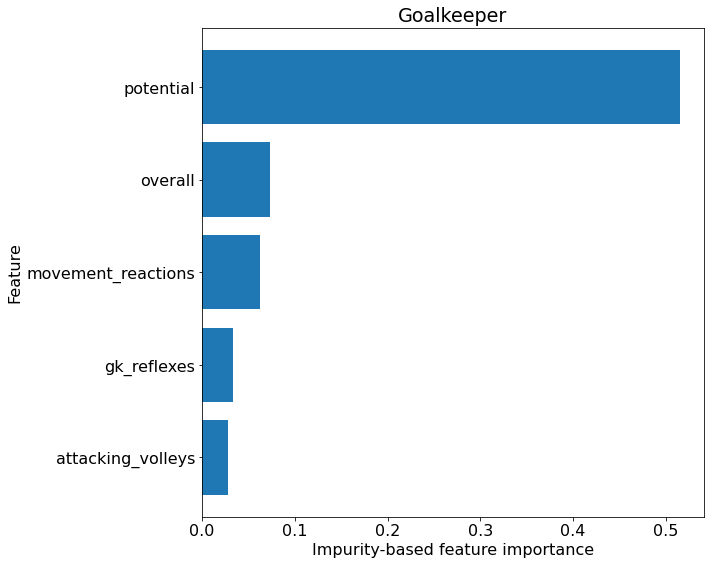

In [29]:
#Goalkeeper
# summarize feature importance
#https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
coef_dict_goalkeeper = {}
for coef, feat in zip(rf_goalkeeper.feature_importances_,goalkeeper_X):
    coef_dict_goalkeeper[feat] = coef
import pandas as pd
coef_dataframe_goalkeeper = pd.DataFrame.from_dict(coef_dict_goalkeeper, orient='index')
order_dataframe_goalkeeper = coef_dataframe_goalkeeper.sort_values(by=[0])
order_dataframe_goalkeeper = order_dataframe_goalkeeper.round(8)
#Number chosen by finding the top 5 of the position
plot_frame_goalkeeper = order_dataframe_goalkeeper[(order_dataframe_goalkeeper >= 0.027988).all(1)]
dict_plot_frame_goalkeeper = plot_frame_goalkeeper.to_dict()
dict_plot_frame_goalkeeper = dict_plot_frame_goalkeeper.get(0)
import matplotlib.pyplot as plt
keys_goalkeeper = list(dict_plot_frame_goalkeeper.keys())
values_goalkeeper = list(dict_plot_frame_goalkeeper.values())
fig = plt.figure(figsize=(9, 9))

# creating the bar plot
plt.barh(keys_goalkeeper, values_goalkeeper)
plt.xlabel('Impurity-based feature importance')
plt.ylabel('Feature')
plt.title('Goalkeeper')
font = {'size':16}
plt.rc('font', **font)
plt.show()

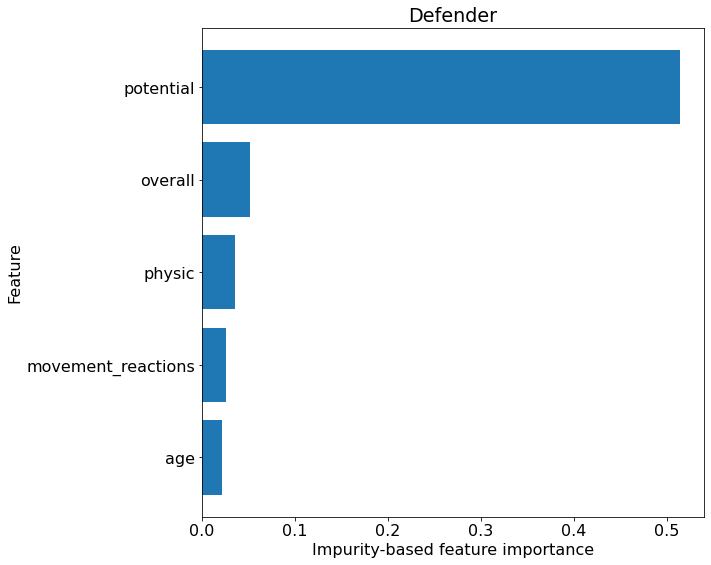

In [4]:
#Defender
# summarize feature importance
#https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
coef_dict_defender = {}
for coef, feat in zip(rf_defender.feature_importances_,defender_X):
    coef_dict_defender[feat] = coef
import pandas as pd
coef_dataframe_defender = pd.DataFrame.from_dict(coef_dict_defender, orient='index')
order_dataframe_defender = coef_dataframe_defender.sort_values(by=[0])
order_dataframe_defender = order_dataframe_defender.round(8)
#Number chosen by finding the top 5 of the position
plot_frame_defender = order_dataframe_defender[(order_dataframe_defender >= 0.021054).all(1)]
dict_plot_frame_defender = plot_frame_defender.to_dict()
dict_plot_frame_defender = dict_plot_frame_defender.get(0)
import matplotlib.pyplot as plt
keys_defender = list(dict_plot_frame_defender.keys())
values_defender = list(dict_plot_frame_defender.values())
fig = plt.figure(figsize=(9, 9))

# creating the bar plot
plt.barh(keys_defender, values_defender)
plt.xlabel('Impurity-based feature importance')
plt.ylabel('Feature')
plt.title('Defender')
font = {'size':16}
plt.rc('font', **font)
plt.show()

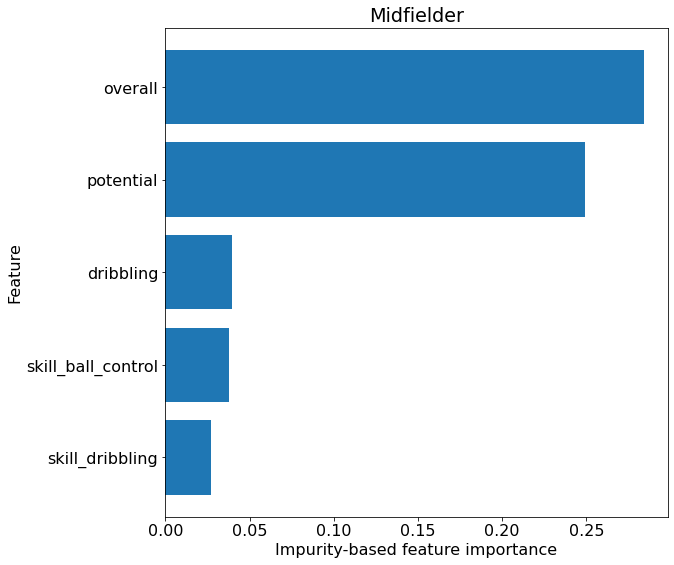

In [27]:
#Midfielder
# summarize feature importance
#https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
coef_dict_midfielder = {}
for coef, feat in zip(rf_midfielder.feature_importances_,midfielder_X):
    coef_dict_midfielder[feat] = coef
import pandas as pd
coef_dataframe_midfielder = pd.DataFrame.from_dict(coef_dict_midfielder, orient='index')
order_dataframe_midfielder = coef_dataframe_midfielder.sort_values(by=[0])
order_dataframe_midfielder = order_dataframe_midfielder.round(8)
#Number chosen by finding the top 5 of the position
plot_frame_midfielder = order_dataframe_midfielder[(order_dataframe_midfielder >= 0.027268).all(1)]
dict_plot_frame_midfielder = plot_frame_midfielder.to_dict()
dict_plot_frame_midfielder = dict_plot_frame_midfielder.get(0)
import matplotlib.pyplot as plt
keys_midfielder = list(dict_plot_frame_midfielder.keys())
values_midfielder = list(dict_plot_frame_midfielder.values())
fig = plt.figure(figsize=(9, 9))

# creating the bar plot
plt.barh(keys_midfielder, values_midfielder)
plt.xlabel('Impurity-based feature importance')
plt.ylabel('Feature')
plt.title('Midfielder')
font = {'size':16}
plt.rc('font', **font)
plt.show()

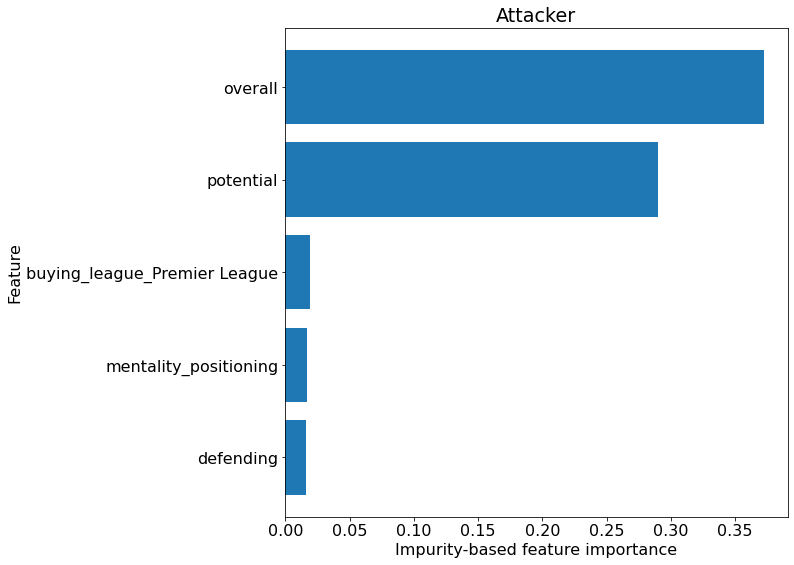

In [25]:
#Attacker
# summarize feature importance
#https://stackoverflow.com/questions/34649969/how-to-find-the-features-names-of-the-coefficients-using-scikit-linear-regressio
coef_dict_attacker = {}
for coef, feat in zip(rf_attacker.feature_importances_,attacker_X):
    coef_dict_attacker[feat] = coef
import pandas as pd
coef_dataframe_attacker = pd.DataFrame.from_dict(coef_dict_attacker, orient='index')
order_dataframe_attacker = coef_dataframe_attacker.sort_values(by=[0])
order_dataframe_attacker = order_dataframe_attacker.round(8)
#Number chosen by finding the top 5 of the position
plot_frame_attacker = order_dataframe_attacker[(order_dataframe_attacker >= 0.015905).all(1)]
dict_plot_frame_attacker = plot_frame_attacker.to_dict()
dict_plot_frame_attacker = dict_plot_frame_attacker.get(0)
import matplotlib.pyplot as plt
keys_attacker = list(dict_plot_frame_attacker.keys())
values_attacker = list(dict_plot_frame_attacker.values())
fig = plt.figure(figsize=(9, 9))

# creating the bar plot
plt.barh(keys_attacker, values_attacker)
plt.xlabel('Impurity-based feature importance')
plt.ylabel('Feature')
plt.title('Attacker')
font = {'size':16}
plt.rc('font', **font)
plt.show()

In [30]:
order_dataframe_defender[0].nlargest(n=5)

potential             0.514534
overall               0.051419
physic                0.035150
movement_reactions    0.025508
age                   0.021054
Name: 0, dtype: float64

In [8]:
test = pd.merge(coef_dataframe_goalkeeper, coef_dataframe_defender, left_index=True, right_index=True)
test = test.rename(columns={test.columns[0]: 'goalkeeper'})
test = test.rename(columns={test.columns[1]: 'defender'})
test

,goalkeeper,defender
age,0.008270,2.105356e-02
year,0.002758,5.753021e-03
height_cm,0.005504,7.409261e-03
weight_kg,0.011482,1.845221e-02
overall,0.073847,5.141901e-02
...,...,...
nationality_United States,0.000000,5.788130e-06
nationality_Uruguay,0.000000,6.439068e-05
nationality_Venezuela,0.000000,2.128460e-07
preferred_foot_Right,0.000372,1.175452e-03


In [9]:
test2 = pd.merge(test, coef_dataframe_midfielder, left_index=True, right_index=True)
test2 = test2.rename(columns={test2.columns[2]: 'midfielder'})
test2
all_positions = pd.merge(test2, coef_dataframe_attacker, left_index=True, right_index=True)
all_positions = all_positions.rename(columns={all_positions.columns[3]: 'attacker'})
all_positions['Total'] = all_positions.sum(axis=1)
all_positions = all_positions.loc[all_positions['Total'] > 0.05]


In [10]:
all_positions = all_positions.T

all_positions = all_positions.drop(['Total'])
all_positions

,age,overall,potential,contract_valid_until,skill_ball_control,movement_reactions,buying_league_Premier League
goalkeeper,0.008270,0.073847,0.515404,0.008878,0.014788,0.062727,0.001891
defender,0.021054,0.051419,0.514534,0.019652,0.007575,0.025508,0.016018
midfielder,0.023828,0.284014,0.248984,0.010077,0.037612,0.010218,0.026478
attacker,0.005934,0.372095,0.290008,0.013841,0.008328,0.010493,0.019356


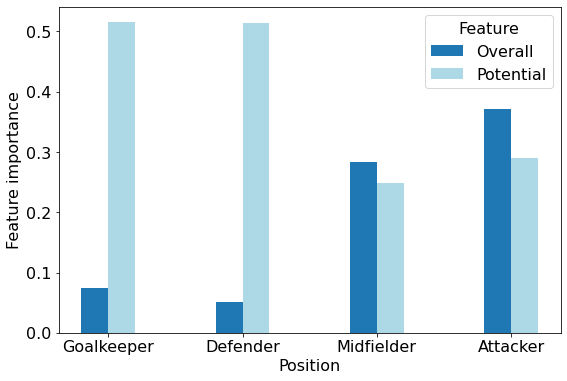

In [11]:
x = np.arange(4)
age = all_positions['age']
overall =all_positions['overall']
potential =all_positions['potential']
contract_valid_until = all_positions['contract_valid_until']
skill_ball_control = all_positions['skill_ball_control']
movement_reactions =all_positions['movement_reactions']
buying_league_Premier_league =all_positions['buying_league_Premier League']
width = 0.2
plt.figure(figsize = (9,6))
plt.bar(x-0.1, overall, width)
plt.bar(x+0.1, potential, width, color='lightblue')

plt.xticks(x, ['Goalkeeper', 'Defender', 'Midfielder', 'Attacker'])
plt.xlabel("Position")
plt.ylabel("Feature importance")

plt.legend(["Overall", "Potential"], title = 'Feature')
plt.show()

In [12]:
#coef_dataframe_goalkeeper = coef_dataframe_goalkeeper.rename(columns={coef_dataframe_goalkeeper.columns[0]: 'goalkeeper'})

In [1]:
#test = pd.concat([coef_dataframe_goalkeeper, coef_dataframe_defender], axis = 1)
#test = test.rename(columns={test.columns[1]: 'defender'})

#test2 = pd.concat([test, coef_dataframe_midfielder], axis = 1)
#test2 = test2.rename(columns={test2.columns[2]: 'midfielder'})
#test2
#all_positions = pd.concat([test2, coef_dataframe_attacker], axis = 1)
#all_positions = all_positions.rename(columns={all_positions.columns[3]: 'attacker'})
#all_positions['Total'] = all_positions.sum(axis=1)

NameError: name 'pd' is not defined

In [14]:
#all_positions = all_positions.T

In [15]:
#all_positions

,age,year,height_cm,weight_kg,overall,potential,international_reputation,weak_foot,skill_moves,contract_valid_until,...,nationality_Bolivia,nationality_Chad,nationality_Dominican Republic,nationality_El Salvador,nationality_Honduras,nationality_Korea Republic,nationality_Latvia,nationality_Lithuania,nationality_Tanzania,nationality_Uzbekistan
goalkeeper,0.008270,0.002758,0.005504,0.011482,0.073847,0.515404,0.007372,0.000408,0.000000,0.008878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
defender,0.021054,0.005753,0.007409,0.018452,0.051419,0.514534,0.005403,0.003117,0.004781,0.019652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
midfielder,0.023828,0.005405,0.005813,0.004502,0.284014,0.248984,0.001587,0.001277,0.000645,0.010077,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attacker,0.005934,0.004990,0.003908,0.004302,0.372095,0.290008,0.002956,0.002111,0.001659,0.013841,...,0.000073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total,0.059085,0.018906,0.022634,0.038738,0.781374,1.568931,0.017318,0.006913,0.007084,0.052448,...,0.000073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#best_features = all_positions[['potential', 'overall', 'movement_reactions', 'gk_kicking', 'attacking_crossing', 'physic', 'movement_reactions', 'contract_valid_until', 'dribbling', 'skill_ball_control','buying_league_Premier League', 'power_stamina', 'mentality_positioning']]


In [17]:
#best_features.fillna(0)

,potential,overall,movement_reactions,gk_kicking,attacking_crossing,physic,movement_reactions,contract_valid_until,dribbling,skill_ball_control,buying_league_Premier League,power_stamina,mentality_positioning
goalkeeper,0.515404,0.073847,0.062727,0.025319,0.014823,0.000000,0.062727,0.008878,0.000000,0.014788,0.001891,0.003112,0.009222
defender,0.514534,0.051419,0.025508,0.000000,0.004599,0.035150,0.025508,0.019652,0.003784,0.007575,0.016018,0.007017,0.002988
midfielder,0.248984,0.284014,0.010218,0.000000,0.007701,0.005423,0.010218,0.010077,0.039420,0.037612,0.026478,0.007413,0.016918
attacker,0.290008,0.372095,0.010493,0.000000,0.006611,0.003712,0.010493,0.013841,0.013676,0.008328,0.019356,0.011438,0.016547
Total,1.568931,0.781374,0.108945,0.025319,0.033734,0.044285,0.108945,0.052448,0.056880,0.068303,0.063743,0.028980,0.045675


([<matplotlib.axis.YTick at 0x271351dd7c0>,
 [Text(0, 0, 'potential'),
  Text(0, 1, 'overall'),
  Text(0, 2, 'movement_reactions'),
  Text(0, 3, 'gk_kicking'),
  Text(0, 4, 'attacking_crossing'),
  Text(0, 5, 'physic'),
  Text(0, 6, 'movement_reactions'),
  Text(0, 7, 'contract_valid_until'),
  Text(0, 8, 'dribbling'),
  Text(0, 9, 'skill_ball_control'),
  Text(0, 10, 'buying_league_Premier League'),
  Text(0, 11, 'power_stamina'),
  Text(0, 12, 'mentality_positioning')])

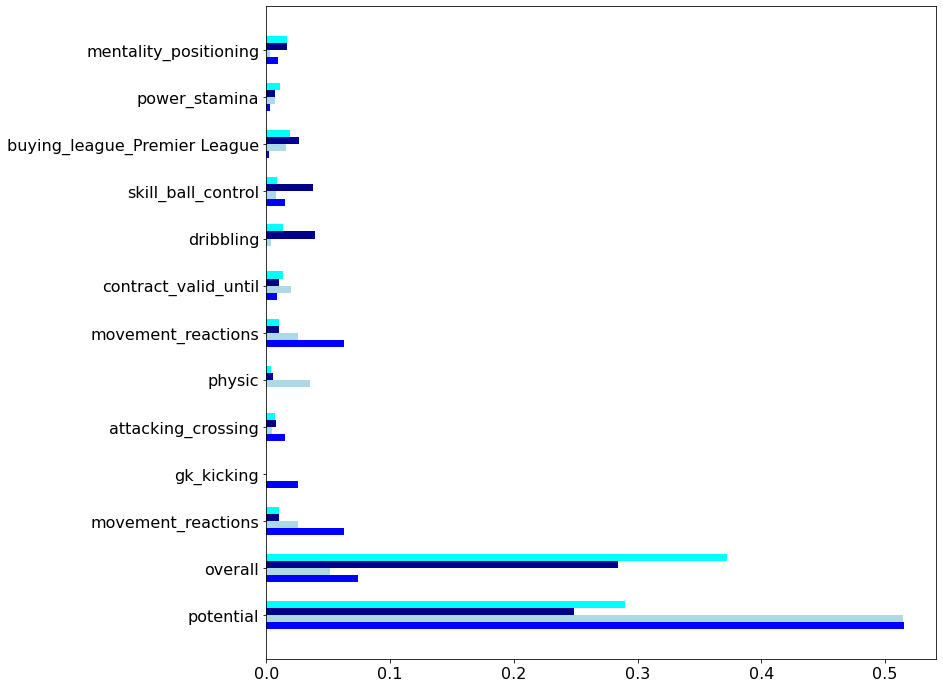

In [18]:
#x = np.arange(2)
#width = 0.15

#bars = best_features.columns
#height_goalkeeper = best_features.loc[['goalkeeper']].values.tolist()
#x_pos = np.arange(len(bars))
#import itertools
#height_goalkeeper = list(itertools.chain.from_iterable(height_goalkeeper))
#height_goalkeeper

#height_defender = best_features.loc[['defender']].values.tolist()
#x_pos = np.arange(len(bars))
#import itertools
#height_defender = list(itertools.chain.from_iterable(height_defender))
#height_defender

#height_midfielder = best_features.loc[['midfielder']].values.tolist()
#x_pos = np.arange(len(bars))
#import itertools
#height_midfielder = list(itertools.chain.from_iterable(height_midfielder))
#height_midfielder

#height_attacker = best_features.loc[['attacker']].values.tolist()
#x_pos = np.arange(len(bars))
#import itertools
#height_attacker = list(itertools.chain.from_iterable(height_attacker))
#height_attacker
#plt.figure(figsize = (12,12))
#plt.barh(x_pos - 0.225, height_goalkeeper, width, color = 'blue')
#plt.barh(x_pos - 0.075, height_defender, width, color = 'lightblue')
#plt.barh(x_pos + 0.075, height_midfielder, width, color = 'darkblue')
#plt.barh(x_pos + 0.225, height_attacker, width, color = 'cyan')
#plt.yticks(x_pos, bars)

In [19]:
#best_features.loc[['goalkeeper']].values.tolist()

[[0.5154040333036137,
  0.07384654385455036,
  0.06272667811200151,
  0.025318647719051984,
  0.014822866819413104,
  nan,
  0.06272667811200151,
  0.008877651414524483,
  nan,
  0.014787951707859306,
  0.0018913685050141323,
  0.003111562682300221,
  0.009222027148365789]]